In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv(r'C:\Users\Hp\Desktop\techmechindra.csv')
data

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TECHM,EQ,23-02-2018,602.60,607.00,624.95,605.00,624.00,621.45,614.98,3490526,2.146588e+09,54012,1511169,43.29
1,TECHM,EQ,26-02-2018,621.45,622.00,627.45,611.05,611.45,612.45,616.37,2923731,1.802110e+09,78789,1718845,58.79
2,TECHM,EQ,27-02-2018,612.45,618.00,618.30,602.45,612.00,610.55,609.00,1905663,1.160549e+09,73209,924704,48.52
3,TECHM,EQ,28-02-2018,610.55,610.20,615.00,603.85,612.95,612.65,611.95,2113430,1.293313e+09,74136,1220913,57.77
4,TECHM,EQ,01-03-2018,612.65,612.05,615.90,605.55,610.65,611.90,611.36,2226114,1.360955e+09,91268,1262096,56.70
5,TECHM,EQ,05-03-2018,611.90,608.50,634.90,606.55,633.90,630.85,621.33,4765322,2.960825e+09,93205,2182442,45.80
6,TECHM,EQ,06-03-2018,630.85,631.90,633.90,615.00,617.00,617.25,624.94,2424505,1.515177e+09,72078,1224998,50.53
7,TECHM,EQ,07-03-2018,617.25,619.80,626.45,606.55,608.00,609.05,617.40,1787149,1.103386e+09,41843,676279,37.84
8,TECHM,EQ,08-03-2018,609.05,615.00,616.75,603.00,603.70,607.20,610.85,1858046,1.134994e+09,47829,816465,43.94
9,TECHM,EQ,09-03-2018,607.20,609.70,623.10,606.50,621.15,619.20,616.45,2095483,1.291767e+09,62593,827697,39.50


Text(0.5, 1.0, 'Autocorrelation plot')

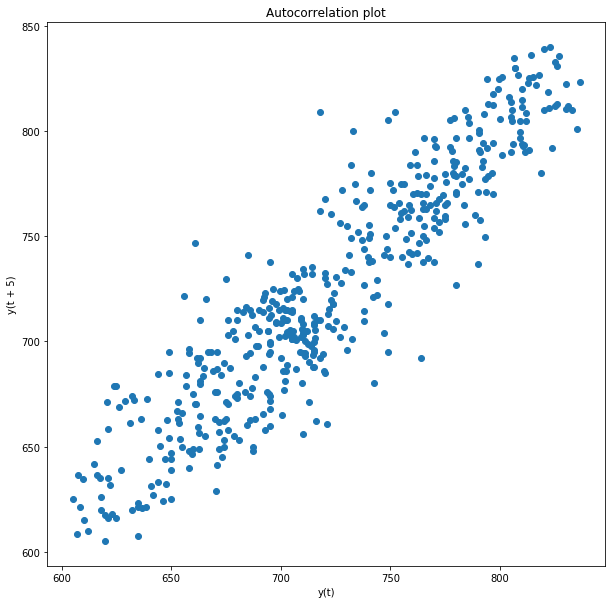

In [4]:
plt.figure(figsize=(10,10))
lag_plot(data['Open Price'], lag=5)
plt.title('Autocorrelation plot')

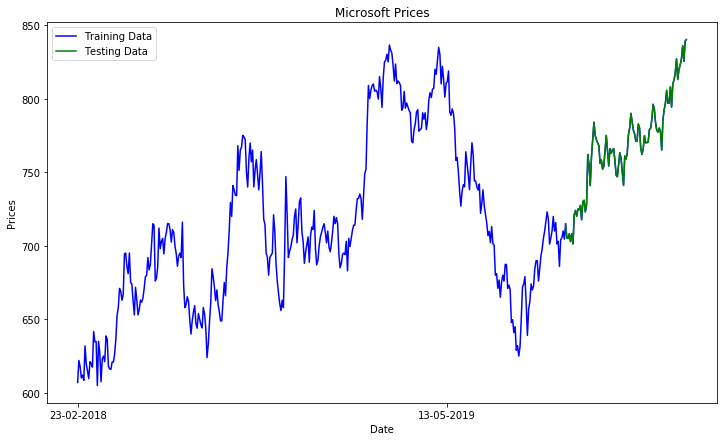

In [5]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Microsoft Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.plot(data['Open Price'], 'blue', label='Training Data')
plt.plot(test_data['Open Price'], 'green', label='Testing Data')
plt.xticks(np.arange(0,400,300), data['Date'][0:400:300])
plt.legend()

In [6]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) +       np.abs(y_true))))

In [7]:
train_ar = train_data['Open Price'].values
test_ar = test_data['Open Price'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 80.509
Symmetric mean absolute percentage error: 4.669


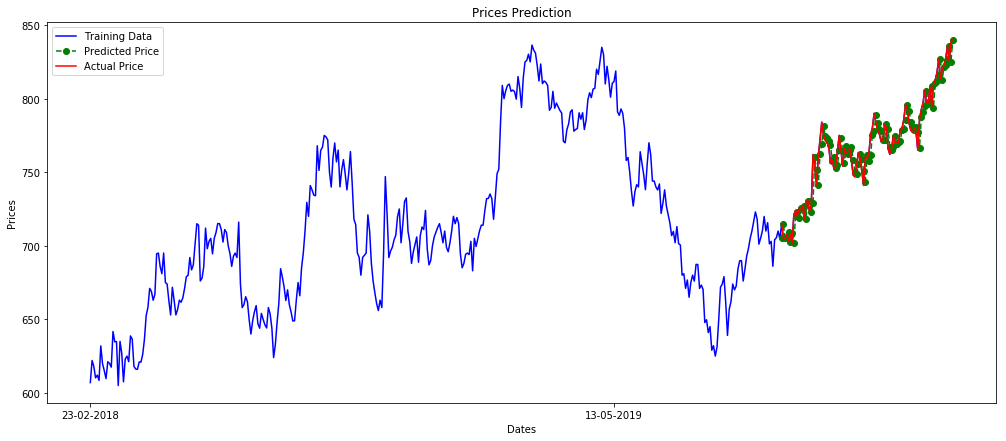

In [16]:
plt.figure(figsize=(17,7))
plt.plot(data['Open Price'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open Price'], color='red', label='Actual Price')
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,400,300), data['Date'][0:400:300])
plt.legend()

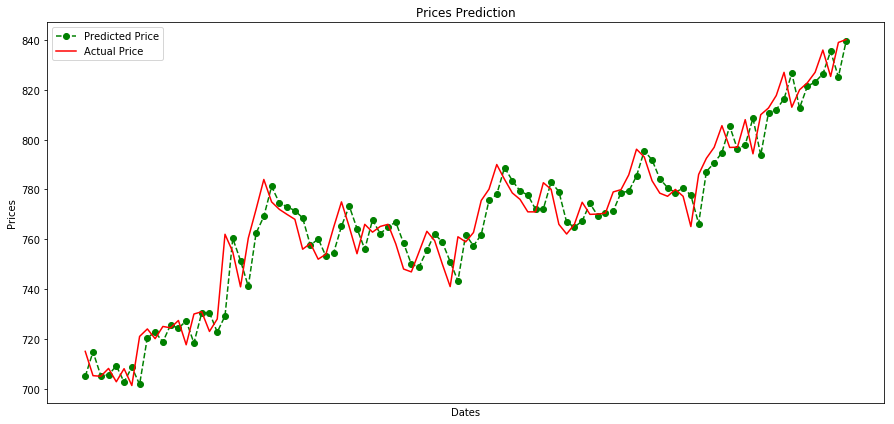

In [25]:
plt.figure(figsize=(15,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_data.index, test_data['Open Price'], color='red', label='Actual Price')
plt.legend()
plt.title('Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(10,60,50), data['Date'][10:80:60])
plt.legend()